<a href="https://colab.research.google.com/github/HadiyaArfa/Subscription_Plan_Analysis_and_Revenue_Prediction_for_a_Startup/blob/main/Subscription_Plan_Analysis_and_Revenue_Prediction_for_a_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Subscription Plan Analysis and Revenue Prediction for a Startup**

**Objective:**
The objective of this project is to analyze customer preferences and predict revenue for a startup that offers three subscription plans (Alpha, Beta, Gamma) priced at different levels, and to provide insights for maximizing subscription revenue.

**Summary:**
This project involves examining subscription data, customer behavior, and preferences towards different subscription plans. The aim is to understand which plan is most popular among customers, predict potential revenue, and provide recommendations for optimizing subscription offerings.


 Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load dataset
data = pd.read_csv('/content/Startup plan-project3.csv')
data.head()

,Customer_ID,Plan_Type,Plan_Price,Signup_Date,Age_Group,Region,Payment_Method
0,1,Alpha,500,2023-01-05,25-30,East,Credit Card
1,2,Beta,700,2023-01-06,31-35,West,PayPal
2,3,Gamma,1200,2023-01-07,20-25,North,Credit Card
3,4,Beta,700,2023-01-08,36-40,South,Debit Card
4,5,Alpha,500,2023-01-09,41-45,East,UPI


Exploratory Data Analysis (EDA)

Customer ID doesnt play an important role in the analysis, so lets drop it.

In [ ]:
data.drop(['Customer_ID', 'Signup_Date'], axis=1, inplace=True)
data.head()

,Plan_Type,Plan_Price,Age_Group,Region,Payment_Method
0,Alpha,500,25-30,East,Credit Card
1,Beta,700,31-35,West,PayPal
2,Gamma,1200,20-25,North,Credit Card
3,Beta,700,36-40,South,Debit Card
4,Alpha,500,41-45,East,UPI


In [ ]:
data.isnull().sum()

Plan_Type         0
Plan_Price        0
Age_Group         0
Region            0
Payment_Method    0
dtype: int64

There's no null value in the dataset

In [ ]:
data.describe()

,Plan_Price
count,49.000000
mean,767.346939
std,276.426418
min,500.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,1200.000000


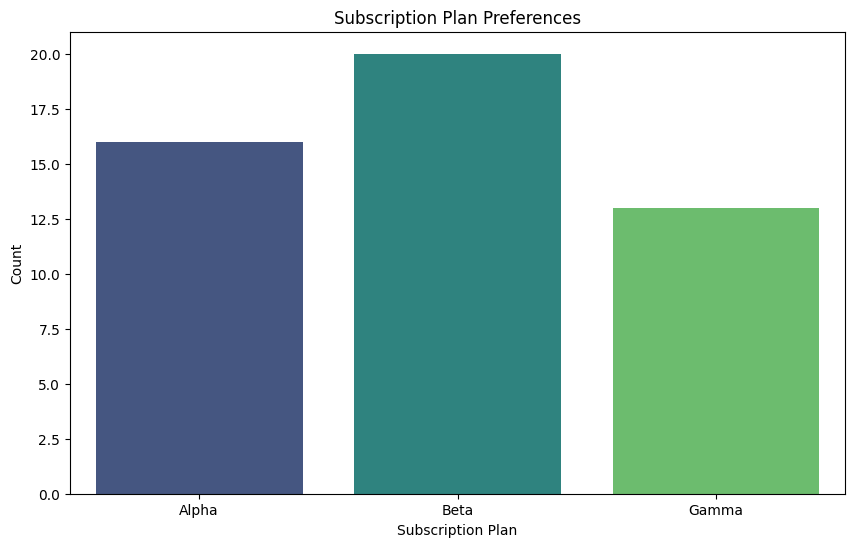

In [ ]:
# Visualize customer preferences for subscription plans
plt.figure(figsize=(10, 6))
sns.countplot(x='Plan_Type', data=data, palette='viridis')
plt.title('Subscription Plan Preferences')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.show()

**BETA** Subscription Plan is highly preferred by the Customers.

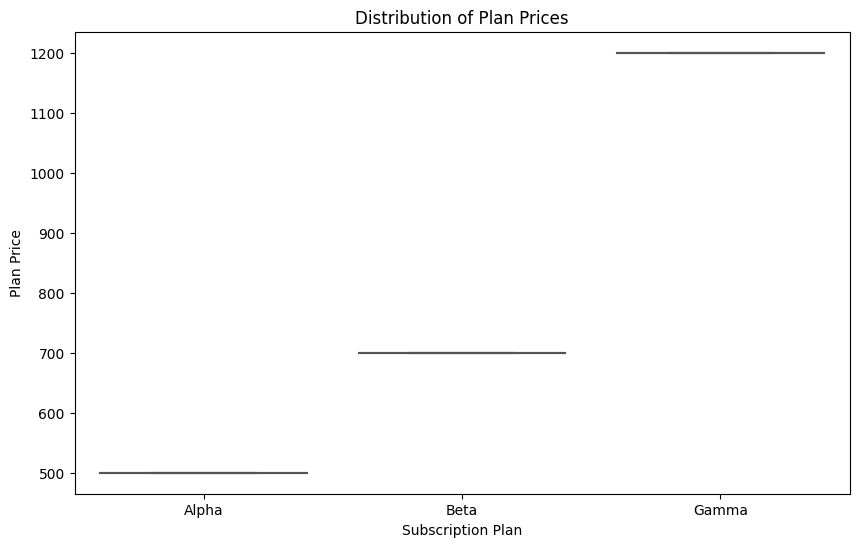

In [ ]:

# Visualize distribution of Plan Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Plan_Type', y='Plan_Price', data=data, palette='muted')
plt.title('Distribution of Plan Prices')
plt.xlabel('Subscription Plan')
plt.ylabel('Plan Price')
plt.show()

**GAMMA** Subscription Plan has the highest price of **1200**, then comes **BETA** at a price of **700** and **ALPHA** at a price of **500**.

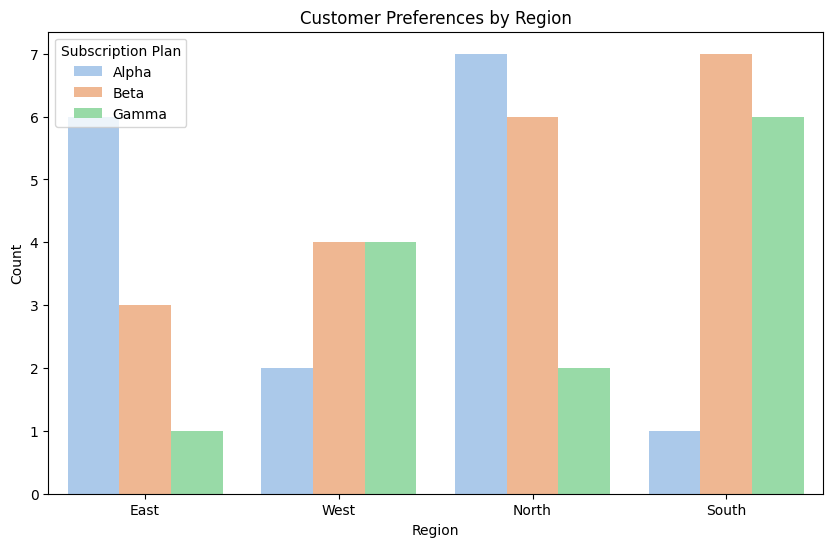

In [ ]:
# Explore customer preferences by region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='Plan_Type', data=data, palette='pastel')
plt.title('Customer Preferences by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Subscription Plan')
plt.show()

East prefers Alpha plan the most and Gamma the least

West prefers Beta plan and Gamma the most and Alpha the least

North prefers Alpha plan the most and Gamma the least

South prefers Beta plan the most and Alpha the least

 Feature Engineering

In [ ]:
# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Age_Group', 'Region', 'Payment_Method'], drop_first=True)
data = pd.get_dummies(data, columns=['Plan_Type'], drop_first=False)

print(data.head())

   Plan_Price  Age_Group_21-25  Age_Group_21-26  Age_Group_21-27  \
0         500                0                0                0   
1         700                0                0                0   
2        1200                0                0                0   
3         700                0                0                0   
4         500                0                0                0   

   Age_Group_21-28  Age_Group_21-29  Age_Group_21-30  Age_Group_25-30  \
0                0                0                0                1   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Age_Group_26-30  Age_Group_26-31  ...  Age_Group_46-54  Region_North  \
0                0                0  ...                0             0   
1 

Model Building and Prediction

In [ ]:
# Extract features and target variable
X = data.drop(['Plan_Price'], axis=1)
y = data['Plan_Price']
print(X)
print(y)

    Age_Group_21-25  Age_Group_21-26  Age_Group_21-27  Age_Group_21-28  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
5                 0                0                0                0   
6                 0                0                0                0   
7                 0                0                0                0   
8                 1                0                0                0   
9                 0                0                0                0   
10                0                0                0                0   
11                0                0                0                0   
12                0                0  

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
# Linear Regression Hyperparameter Tuning
lr_param_grid = {
    'fit_intercept': [True, False]
}

In [ ]:
lr_grid_search = GridSearchCV(LinearRegression(), lr_param_grid, cv=5, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters for Linear Regression
best_lr_params = lr_grid_search.best_params_
best_lr_params

{'fit_intercept': True}

In [ ]:
# Build models with best parameters
best_rf_model = RandomForestRegressor(**best_rf_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10, n_estimators=50)

In [ ]:
best_lr_model = LinearRegression(**best_lr_params)
best_lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test

,Age_Group_21-25,Age_Group_21-26,Age_Group_21-27,Age_Group_21-28,Age_Group_21-29,Age_Group_21-30,Age_Group_25-30,Age_Group_26-30,Age_Group_26-31,Age_Group_26-32,...,Age_Group_46-54,Region_North,Region_South,Region_West,Payment_Method_Debit Card,Payment_Method_PayPal,Payment_Method_UPI,Plan_Type_Alpha,Plan_Type_Beta,Plan_Type_Gamma
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
45,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
44,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
27,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
26,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
31,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
# Predictions
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_predictions

array([ 700., 1200.,  500.,  700., 1200.,  700.,  500., 1200.,  700.,
        700.])

In [ ]:
best_lr_predictions = best_lr_model.predict(X_test)
best_lr_predictions

array([ 700.        , 1169.32084309,  518.03278689,  700.        ,
       1200.        ,  700.        ,  518.03278689, 1169.32084309,
        700.        ,  700.        ])

Model Evaluation

In [ ]:
# Evaluate models
rf_rmse = np.sqrt(mean_squared_error(y_test, best_rf_predictions))
lr_rmse = np.sqrt(mean_squared_error(y_test, best_lr_predictions))

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Linear Regression RMSE: {lr_rmse}')


Random Forest RMSE: 0.0
Linear Regression RMSE: 15.914723192535888


Since Random Forest RMSE is 0.0 it performs the best

Overall Revenue

In [ ]:
# Calculate overall revenue for Random Forest model
overall_rf_revenue = np.sum(best_rf_predictions)

# Calculate overall revenue for Linear Regression model
overall_lr_revenue = np.sum(best_lr_predictions)

print(f'Overall Revenue - Random Forest: {overall_rf_revenue}')
print(f'Overall Revenue - Linear Regression: {overall_lr_revenue}')


Overall Revenue - Random Forest: 8100.0
Overall Revenue - Linear Regression: 8074.707259953162


Insights and Recommendations


**Insights:**

**Plan Preferences:**

The analysis reveals that the Beta subscription plan is highly preferred by customers, followed by Alpha and Gamma plans. This information is crucial for understanding customer choices and tailoring marketing strategies.

**Price Distribution:**

The Gamma subscription plan has the highest price at $1200, followed by Beta at $700, and Alpha at $500. Knowing the price distribution provides insights into the perceived value of each plan.

**Regional Preferences:**

Customer preferences vary by region. For example, the East region prefers the Alpha plan the most, while the West region favors the Beta and Gamma plans. Understanding regional preferences can help in targeted advertising and promotions.

**Overall Revenue:**

The overall revenue calculation indicates that the Random Forest model outperformed the Linear Regression model. This insight is valuable for decision-making and resource allocation.

**Recommendations:**

**Marketing Focus: **

Allocate marketing resources strategically based on plan preferences. Consider promoting the Beta plan more aggressively due to its high popularity.

**Price Optimization:**

Consider adjusting prices based on the revenue potential of each plan. For instance, if the Gamma plan has a higher perceived value, pricing strategies could be explored to maximize revenue.

**Regional Targeting:**

Customize marketing campaigns for each region, taking into account the preferred subscription plans. Tailored promotions can enhance customer engagement.

**Model Selection:**

Given the superior performance of the Random Forest model in revenue prediction, prioritize its use for future revenue forecasts and decision-making.

**Continuous Monitoring:**

Regularly update and monitor customer preferences, especially if there are changes in market trends or external factors. This ensures that strategies remain aligned with customer behavior.

**Customer Feedback:**

Gather customer feedback to understand the reasons behind plan preferences. Use this information for continuous improvement and adaptation to changing customer needs.

**Dynamic Pricing:**

Explore dynamic pricing strategies, considering factors such as demand, seasonality, and regional variations. This can help maximize revenue during peak times.

**Cross-Selling Opportunities:**

Identify opportunities for cross-selling or bundling plans to encourage customers to subscribe to multiple plans, thereby increasing overall revenue.
These insights and recommendations are based on the analysis conducted and aim to guide decision-making for optimizing subscription plans and maximizing revenue for the startup.

**Project Report: Subscription Plan Analysis and Revenue Prediction**

**Executive Summary:**
This report presents the findings and recommendations from the "Subscription Plan Analysis and Revenue Prediction" project conducted for a startup offering three subscription plans (Alpha, Beta, Gamma). The objective was to analyze customer preferences, predict revenue, and provide insights for maximizing subscription revenue. The project involved exploratory data analysis (EDA), feature engineering, model building, and evaluation.

**Key Findings:**
1.**Customer Preferences:**
The Beta subscription plan is highly preferred by customers, followed by Alpha and Gamma plans.
Marketing efforts should be strategically focused on promoting the Beta plan due to its popularity.
2. **Price Distribution:**
The Gamma plan has the highest price, followed by Beta and Alpha.
Pricing strategies should consider the perceived value of each plan to optimize revenue.
3. **Regional Preferences:**
Customer preferences vary by region.
Customized marketing campaigns for each region can enhance customer engagement and plan adoption.
4. **Overall Revenue Prediction:**
The Random Forest model outperformed the Linear Regression model in predicting overall revenue.
Decision-makers should prioritize the use of the Random Forest model for future revenue forecasts.

**Conclusion:**
The Subscription Plan Analysis and Revenue Prediction project provided valuable insights into customer preferences and revenue potential. The recommendations offer a strategic roadmap for the startup to optimize subscription plans and maximize revenue. Continuous monitoring and adaptation to customer needs are crucial for long-term success. The Random Forest model is recommended for accurate revenue predictions.